In [1]:
#%% Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
from os.path import join as pjoin

import matplotlib.pyplot as plt
import matplotlib as mpl
from spks.event_aligned import population_peth
from spks.utils import alpha_function
from ephys.utils_analysis import compute_mean_sem
from ephys.viz import plot_psth

pd.set_option('display.max_columns', 100)

plt.rcParams['text.usetex'] = False
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 100

%config InlineBackend.figure_format = 'svg'
%matplotlib widget
%load_ext autoreload
%autoreload 2



#%% Load data
animal = 'GRB006'  # example animal
session = '20240723_142451'  # example session

data_dir = '/Users/gabriel/data'
trial_ts = pd.read_pickle(pjoin(data_dir, animal, session, "pre_processed", "trial_ts.pkl"))
spike_times_per_unit = np.load(pjoin(data_dir, animal, session, "pre_processed", "spike_times_per_unit.npy"), allow_pickle=True)

trial_ts = trial_ts[
    trial_ts['stationary_stims'].apply(lambda x: len(x) > 0) &
    trial_ts['movement_stims'].apply(lambda x: len(x) > 0) &
    trial_ts['center_port_entries'].apply(lambda x: len(x) > 0)
].copy()

In [2]:
first_stim = np.array([stims[0] for _, stims in trial_ts.stim_ts.items() if len(stims) > 0])
second_stim = np.array([stims[1] for _, stims in trial_ts.stim_ts.items()if len(stims) > 1])
third_stim = np.array([stims[2] for _, stims in trial_ts.stim_ts.items() if len(stims) > 2])
fourth_stim = np.array([stims[3] for _, stims in trial_ts.stim_ts.items() if len(stims) > 3])
fifth_stim = np.array([stims[4] for _, stims in trial_ts.stim_ts.items() if len(stims) > 4])

In [28]:
pre_seconds = 0.05
post_seconds = 0.15
binwidth_ms = 25 

t_decay = 0.025
t_rise = 0.001
decay = t_decay / (binwidth_ms/1000)
kern = alpha_function(int(decay * 15), t_rise=t_rise, t_decay=decay, srate=1./(binwidth_ms/1000))

first_peth, first_timebins, event_index = population_peth(all_spike_times=spike_times_per_unit,
                                                alignment_times=first_stim,
                                                pre_seconds=pre_seconds,
                                                post_seconds=post_seconds,
                                                binwidth_ms=binwidth_ms,
                                                kernel=kern,
                                                pad=0)


In [30]:
first_timebins.shape, first_peth.shape

((7,), (137, 381, 6))

ValueError: x and y must have same first dimension, but have shapes (6,) and (137, 381, 5)

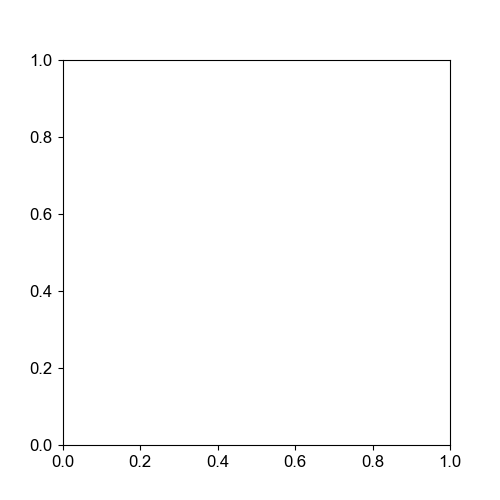

In [ ]:
fig, ax = plt.subplots(1, figsize=(5,5))
mean, sem = compute_mean_sem(first_peth)
ax.plot(first_timebins, mean)

ValueError: x and y must have same first dimension, but have shapes (6,) and (381, 5)

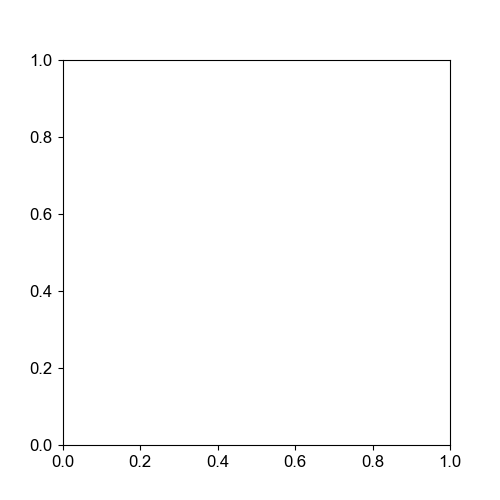

In [15]:
fig, ax = plt.subplots(1, figsize=(5,5))
plot_psth(compute_mean_sem(first_peth),
          first_timebins, 
          pre_seconds=pre_seconds,
          post_seconds=post_seconds,
          binwidth_ms=binwidth_ms,
          ax=ax)
